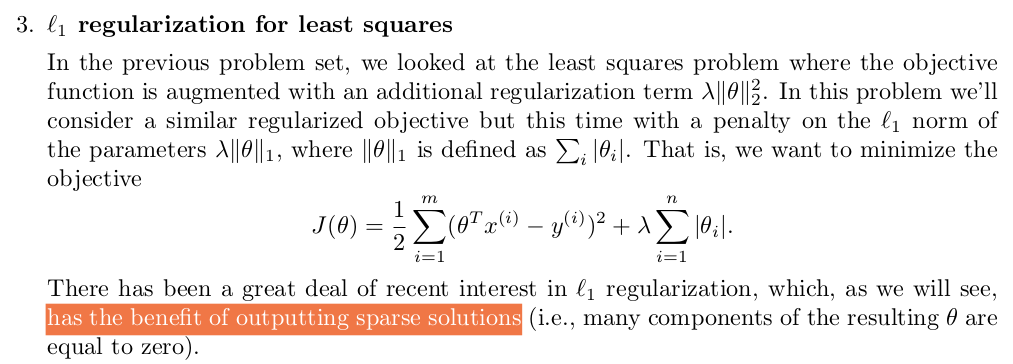

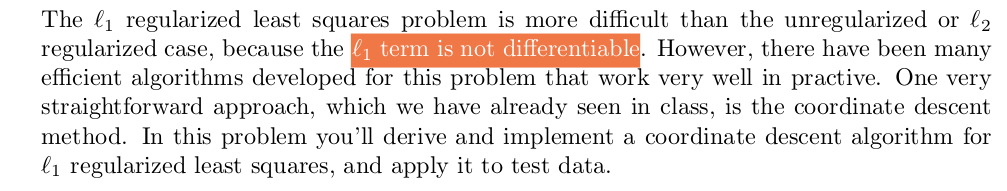

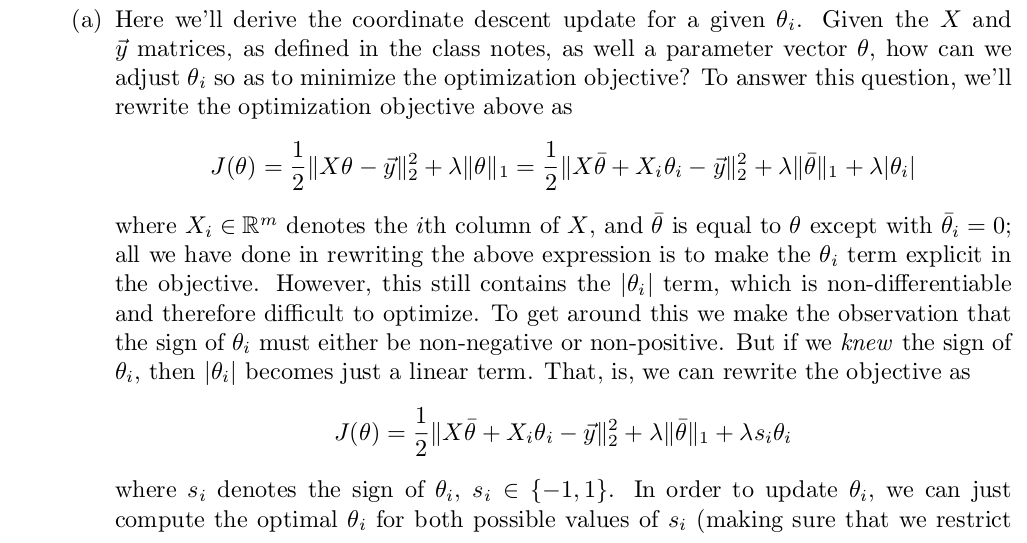

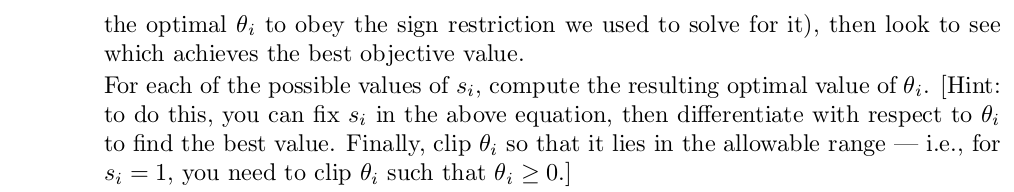

> * if sign of **theta is positive**
>
> $$\theta_i = max \left\{ - \frac {X_i^T (X \bar \theta - \vec y) + \lambda}{X_i^T X_i} , 0 \right\} $$

> * if sign of **theta is negative**
>
> $$\theta_i = min \left\{ - \frac {X_i^T (X \bar \theta - \vec y) - \lambda}{X_i^T X_i} , 0 \right\} $$

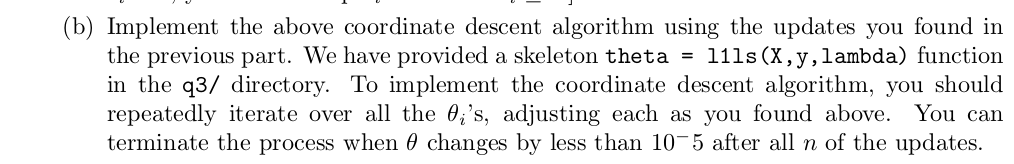

In [43]:
import numpy as np

In [83]:
#np.loadtxt('./data/PS3-data/q3/x.dat')
X = np.loadtxt('./data/PS3-data/q3/x.dat')
y = np.loadtxt('./data/PS3-data/q3/y.dat')[:, np.newaxis]

print(X.shape)
print(y.shape)

(20, 100)
(20, 1)


* **20 training examples**
* **100-dimensional space**, corresponding to 100 **input *features***

In [84]:
theta_true = np.loadtxt('./data/PS3-data/q3/theta.dat')[:, np.newaxis]
print(theta_true.shape)

(100, 1)


* A **feature weight** $\theta_i$ for **each** feature $X_i$

In [85]:
X.T.shape

(100, 20)

In [86]:
def norm1(X):
    return np.linalg.norm(X, ord=1)

def norm2(X):
    if X.ndim > 1:
        X = X[:,0]
    return np.linalg.norm(X, ord=2)

In [104]:
# Least squares with L1 regularization
def l1ls(X, y, lambd=1, VERBOSE=True):
    if X.ndim!=2:
        print("Error! X.ndim != 2")
        return 0
    if y.ndim!=2:
        print("Error! y.ndim != 2")
        return 0
    n = X.shape[1]
    theta = np.zeros((n, 1)) 
    last_theta = np.ones((n, 1))
    theta_dimensions = theta.shape[0]
    epoch = 0
    while np.linalg.norm((theta - last_theta), ord=1) > 1e-5 and epoch < 10000:
        last_theta = theta.copy()
        for i in range(theta_dimensions):
            # theta_i
            theta_i = theta[i,0].copy()
            # theta_bar + theta_i == theta
            theta[i,0] = 0.0
            # Searching for optimal theta
            # First case: theta_i > 0
            Xi = X[:,i, np.newaxis]
            theta_i_pos = -(np.dot(Xi.T, (np.dot(X, theta) - y)) + lambd) / \
                            np.dot(Xi.T, Xi)
            theta_i_pos = np.max(theta_i_pos, 0)
            # Second case: theta_i < 0
            theta_i_neg = -(np.dot(Xi.T, (np.dot(X, theta) - y)) - lambd) / \
                            np.dot(Xi.T, Xi)
            theta_i_neg = np.min(theta_i_neg, 0)
            # Loss/objective/risk/energy/error function
            # Check loss with first case
            theta[i, 0] = theta_i_pos[0]
            loss_pos = 1/2 * norm2(np.dot(X, theta) - y)**2 + \
                                lambd*norm1(theta)
            # Check loss with second case
            theta[i, 0] = theta_i_neg[0]
            loss_neg = 1/2 * norm2(np.dot(X, theta) - y)**2 + \
                                lambd*norm1(theta)
            # Choose best one
            if loss_pos < loss_neg:
                theta[i, 0] = theta_i_pos[0]
            elif loss_pos > loss_neg:
                theta[i, 0] = theta_i_neg[0]
            else:
                # Same loss, choose theta randomly
                theta[i, 0] = np.random.choice((theta_i_pos[0],theta_i_neg[0]))
            theta_optimal = np.argmin((loss_pos, loss_neg))
        epoch += 1
        if VERBOSE:
            print("Loss: {:3.4f}".format(1/2 * norm2(np.dot(X,theta) - y)**2 + lambd*norm1(theta)) )
    return theta

There is some problem with the code.

# TODO:

* Simpler 2d case with plots
* Done on "Toy example" notbook:
  
  ***'./Toy example - L1 Regularization for Least Squares.ipynb'***

In [105]:
theta = l1ls(X, y, lambd=1)

Loss: 13.2209
Loss: 14.0668
Loss: 13.4415
Loss: 11.8446
Loss: 12.8670
Loss: 13.2665
Loss: 12.2736
Loss: 13.0010
Loss: 13.7561
Loss: 12.6735
Loss: 12.5079
Loss: 12.6985
Loss: 13.4104
Loss: 11.8862
Loss: 12.1541
Loss: 12.2869
Loss: 11.4925
Loss: 13.7027
Loss: 12.8735
Loss: 12.1969
Loss: 12.8528
Loss: 12.8826
Loss: 13.1860
Loss: 13.4844
Loss: 14.0358
Loss: 12.5327
Loss: 12.6479
Loss: 12.7548
Loss: 13.3179
Loss: 13.6743
Loss: 12.4649
Loss: 13.2944
Loss: 12.6374
Loss: 11.6616
Loss: 13.2669
Loss: 11.8823
Loss: 12.3352
Loss: 12.4250
Loss: 12.4133
Loss: 12.3873
Loss: 12.1214
Loss: 12.3720
Loss: 12.5864
Loss: 13.6821
Loss: 13.2373
Loss: 12.4750
Loss: 12.3593
Loss: 12.7954
Loss: 12.9133
Loss: 12.4991
Loss: 13.4366
Loss: 13.7318
Loss: 11.8401
Loss: 11.4105
Loss: 12.4814
Loss: 13.0784
Loss: 12.4063
Loss: 12.9086
Loss: 12.6301
Loss: 13.5192
Loss: 14.3280
Loss: 14.2427
Loss: 13.0172
Loss: 13.2242
Loss: 12.6072
Loss: 12.0077
Loss: 12.2135
Loss: 13.5001
Loss: 12.2749
Loss: 12.6989
Loss: 12.6868
Loss: 

Loss: 13.2332
Loss: 13.2545
Loss: 12.6657
Loss: 12.6164
Loss: 12.4785
Loss: 12.3732
Loss: 13.0142
Loss: 12.7763
Loss: 13.9346
Loss: 11.9590
Loss: 12.9424
Loss: 12.9641
Loss: 11.8903
Loss: 12.6181
Loss: 13.3567
Loss: 12.4278
Loss: 12.7490
Loss: 12.7329
Loss: 12.2262
Loss: 12.2955
Loss: 12.5519
Loss: 12.4274
Loss: 11.6388
Loss: 11.4166
Loss: 12.8198
Loss: 12.0485
Loss: 14.2419
Loss: 11.6186
Loss: 12.5478
Loss: 12.3072
Loss: 11.2714
Loss: 12.1684
Loss: 11.0042
Loss: 12.7830
Loss: 12.4499
Loss: 12.6942
Loss: 12.4786
Loss: 12.9606
Loss: 11.6241
Loss: 13.4878
Loss: 12.0658
Loss: 14.1047
Loss: 12.2136
Loss: 12.4214
Loss: 12.5572
Loss: 12.3568
Loss: 12.1384
Loss: 12.0704
Loss: 12.6564
Loss: 12.2713
Loss: 12.5140
Loss: 12.7851
Loss: 11.7785
Loss: 12.9621
Loss: 12.9177
Loss: 12.0242
Loss: 12.8665
Loss: 12.0905
Loss: 11.8363
Loss: 12.7919
Loss: 12.5436
Loss: 12.5009
Loss: 12.9272
Loss: 13.4913
Loss: 11.8347
Loss: 12.7136
Loss: 12.5109
Loss: 12.3559
Loss: 12.1669
Loss: 12.3287
Loss: 12.2705
Loss: 

Loss: 13.8629
Loss: 12.2823
Loss: 13.1080
Loss: 12.4706
Loss: 10.9809
Loss: 12.8873
Loss: 12.9467
Loss: 12.5856
Loss: 13.0696
Loss: 12.3274
Loss: 12.3170
Loss: 12.8726
Loss: 12.6641
Loss: 12.6160
Loss: 12.6173
Loss: 12.4145
Loss: 12.0840
Loss: 12.7051
Loss: 12.6418
Loss: 11.9858
Loss: 11.7794
Loss: 12.4377
Loss: 12.3820
Loss: 11.2949
Loss: 12.8644
Loss: 12.3330
Loss: 12.4555
Loss: 12.3297
Loss: 11.5485
Loss: 13.0367
Loss: 13.4747
Loss: 12.2919
Loss: 12.1672
Loss: 13.6715
Loss: 12.2557
Loss: 12.5558
Loss: 11.9317
Loss: 12.6489
Loss: 13.3406
Loss: 12.5789
Loss: 11.2813
Loss: 14.3239
Loss: 11.8687
Loss: 12.4490
Loss: 13.1442
Loss: 13.4482
Loss: 12.4525
Loss: 12.7261
Loss: 11.8975
Loss: 12.5649
Loss: 12.1943
Loss: 11.9700
Loss: 12.0830
Loss: 11.7975
Loss: 12.5203
Loss: 13.3701
Loss: 12.9300
Loss: 12.9176
Loss: 12.7316
Loss: 12.3626
Loss: 13.7116
Loss: 12.4915
Loss: 12.9096
Loss: 11.7053
Loss: 12.0544
Loss: 12.1978
Loss: 10.9393
Loss: 12.3944
Loss: 12.2781
Loss: 12.1125
Loss: 12.7253
Loss: 

Loss: 13.1329
Loss: 13.1649
Loss: 11.2736
Loss: 12.6845
Loss: 12.0120
Loss: 12.7100
Loss: 12.4808
Loss: 12.6300
Loss: 12.8030
Loss: 12.4249
Loss: 11.6242
Loss: 12.6805
Loss: 14.0253
Loss: 13.1137
Loss: 12.1695
Loss: 12.3171
Loss: 12.2170
Loss: 12.4947
Loss: 12.8018
Loss: 13.8482
Loss: 12.4382
Loss: 11.7220
Loss: 12.0192
Loss: 12.4366
Loss: 12.5354
Loss: 13.1816
Loss: 12.2791
Loss: 13.3035
Loss: 11.6336
Loss: 12.4923
Loss: 12.6197
Loss: 12.6730
Loss: 12.2709
Loss: 12.8083
Loss: 12.8513
Loss: 11.5588
Loss: 12.8691
Loss: 13.0214
Loss: 11.9768
Loss: 12.8657
Loss: 12.7373
Loss: 13.0596
Loss: 12.3805
Loss: 13.8895
Loss: 12.2160
Loss: 12.1477
Loss: 12.9022
Loss: 13.3183
Loss: 12.3627
Loss: 11.1880
Loss: 12.8541
Loss: 12.2898
Loss: 12.5261
Loss: 12.7588
Loss: 13.4853
Loss: 13.7484
Loss: 13.4756
Loss: 12.3364
Loss: 12.5548
Loss: 12.0087
Loss: 13.1134
Loss: 12.4717
Loss: 12.0932
Loss: 12.3265
Loss: 12.8637
Loss: 12.6938
Loss: 12.9219
Loss: 12.4006
Loss: 12.0883
Loss: 12.9706
Loss: 12.9435
Loss: 

Loss: 12.0248
Loss: 12.5937
Loss: 12.4347
Loss: 12.2587
Loss: 12.8022
Loss: 12.3591
Loss: 12.7644
Loss: 12.7474
Loss: 12.5101
Loss: 12.8612
Loss: 13.3004
Loss: 12.5439
Loss: 12.9004
Loss: 11.6778
Loss: 12.7147
Loss: 13.7061
Loss: 13.3303
Loss: 12.2325
Loss: 13.0089
Loss: 12.7987
Loss: 12.8301
Loss: 12.2382
Loss: 13.1212
Loss: 13.1613
Loss: 12.0174
Loss: 12.0564
Loss: 12.2441
Loss: 12.1949
Loss: 12.7745
Loss: 13.3117
Loss: 12.1738
Loss: 11.8836
Loss: 12.1640
Loss: 12.4994
Loss: 12.2543
Loss: 12.4314
Loss: 12.6704
Loss: 12.1086
Loss: 12.9349
Loss: 12.2290
Loss: 11.9572
Loss: 13.7550
Loss: 12.9761
Loss: 12.0296
Loss: 12.8448
Loss: 13.4379
Loss: 12.8847
Loss: 13.2671
Loss: 13.6866
Loss: 11.5148
Loss: 13.1327
Loss: 13.2098
Loss: 12.3571
Loss: 11.6428
Loss: 12.4067
Loss: 13.1621
Loss: 12.3030
Loss: 12.1914
Loss: 12.4129
Loss: 12.1286
Loss: 12.8892
Loss: 12.8253
Loss: 13.6736
Loss: 11.6693
Loss: 12.5613
Loss: 12.5150
Loss: 12.1265
Loss: 12.4565
Loss: 12.8083
Loss: 13.1010
Loss: 11.9205
Loss: 

Loss: 12.7007
Loss: 12.9507
Loss: 12.3465
Loss: 11.6211
Loss: 13.6135
Loss: 13.2426
Loss: 10.8809
Loss: 12.1456
Loss: 12.2894
Loss: 12.4535
Loss: 14.1226
Loss: 12.2693
Loss: 12.1471
Loss: 11.9776
Loss: 12.8564
Loss: 12.2319
Loss: 12.6045
Loss: 12.6037
Loss: 12.4489
Loss: 13.0180
Loss: 12.8227
Loss: 11.4996
Loss: 12.5957
Loss: 13.1716
Loss: 12.0248
Loss: 12.6188
Loss: 12.2463
Loss: 12.3734
Loss: 12.1238
Loss: 12.0109
Loss: 12.9503
Loss: 12.8997
Loss: 12.7899
Loss: 13.4446
Loss: 13.3341
Loss: 12.2687
Loss: 12.0331
Loss: 12.3654
Loss: 12.3272
Loss: 11.8633
Loss: 12.3767
Loss: 13.0265
Loss: 13.3412
Loss: 13.8852
Loss: 14.1271
Loss: 12.4283
Loss: 12.1875
Loss: 12.7298
Loss: 13.0616
Loss: 13.0308
Loss: 13.9350
Loss: 12.9496
Loss: 13.3633
Loss: 13.2373
Loss: 11.5759
Loss: 11.7564
Loss: 11.2739
Loss: 12.0028
Loss: 12.8078
Loss: 12.6658
Loss: 13.4055
Loss: 11.8734
Loss: 12.6115
Loss: 13.0148
Loss: 13.0107
Loss: 13.2853
Loss: 12.6284
Loss: 12.0858
Loss: 12.3817
Loss: 11.3857
Loss: 11.1990
Loss: 

Loss: 12.2606
Loss: 12.6789
Loss: 13.1404
Loss: 12.9872
Loss: 12.7535
Loss: 13.5554
Loss: 13.5330
Loss: 13.1747
Loss: 12.9480
Loss: 13.8342
Loss: 13.0697
Loss: 12.2594
Loss: 12.0845
Loss: 13.2221
Loss: 12.5936
Loss: 12.9972
Loss: 12.4073
Loss: 12.5536
Loss: 12.5415
Loss: 13.1097
Loss: 12.1939
Loss: 12.1987
Loss: 12.4189
Loss: 12.7715
Loss: 11.7211
Loss: 10.7482
Loss: 12.4282
Loss: 12.5157
Loss: 12.5732
Loss: 12.5285
Loss: 14.0800
Loss: 12.7581
Loss: 12.2420
Loss: 11.2550
Loss: 12.6521
Loss: 11.4878
Loss: 11.7848
Loss: 13.3884
Loss: 12.3552
Loss: 13.0470
Loss: 11.9962
Loss: 12.0116
Loss: 12.3082
Loss: 12.6969
Loss: 12.8918
Loss: 12.9816
Loss: 13.2266
Loss: 12.1140
Loss: 13.2162
Loss: 12.7407
Loss: 12.3618
Loss: 12.3177
Loss: 12.4492
Loss: 11.9349
Loss: 11.6703
Loss: 13.1040
Loss: 12.4424
Loss: 12.1598
Loss: 12.8822
Loss: 12.8697
Loss: 12.3683
Loss: 11.9381
Loss: 11.8825
Loss: 12.9033
Loss: 12.8556
Loss: 13.6268
Loss: 11.4943
Loss: 13.7373
Loss: 12.7903
Loss: 12.4665
Loss: 12.3607
Loss: 

Loss: 12.1249
Loss: 12.8885
Loss: 12.4534
Loss: 12.8290
Loss: 13.2589
Loss: 12.5225
Loss: 13.3256
Loss: 12.4036
Loss: 13.1372
Loss: 12.6181
Loss: 12.7757
Loss: 13.0464
Loss: 11.9735
Loss: 12.8073
Loss: 11.9263
Loss: 13.3787
Loss: 13.9315
Loss: 11.5274
Loss: 13.5553
Loss: 13.0219
Loss: 13.5152
Loss: 13.1524
Loss: 12.4596
Loss: 13.1734
Loss: 12.5091
Loss: 12.2261
Loss: 12.2297
Loss: 12.8643
Loss: 12.9527
Loss: 12.3594
Loss: 13.2239
Loss: 12.9881
Loss: 13.1354
Loss: 12.8483
Loss: 12.9369
Loss: 13.0659
Loss: 11.2158
Loss: 12.3294
Loss: 12.2696
Loss: 12.7450
Loss: 12.6814
Loss: 13.4026
Loss: 13.3236
Loss: 12.6746
Loss: 12.6791
Loss: 12.4126
Loss: 13.1631
Loss: 12.7110
Loss: 12.4465
Loss: 12.9955
Loss: 12.3044
Loss: 12.5003
Loss: 13.3452
Loss: 13.3432
Loss: 11.4715
Loss: 12.3146
Loss: 12.0532
Loss: 11.5321
Loss: 10.9368
Loss: 11.6994
Loss: 12.6434
Loss: 12.9086
Loss: 13.8288
Loss: 12.8856
Loss: 11.9436
Loss: 13.0986
Loss: 12.8235
Loss: 12.8134
Loss: 11.7729
Loss: 12.2871
Loss: 11.6456
Loss: 

Loss: 12.0188
Loss: 12.5787
Loss: 10.5407
Loss: 12.1027
Loss: 12.8705
Loss: 13.1053
Loss: 13.5728
Loss: 13.8407
Loss: 11.8660
Loss: 11.4999
Loss: 11.7124
Loss: 12.6767
Loss: 12.2350
Loss: 11.5429
Loss: 12.7943
Loss: 12.7426
Loss: 11.4695
Loss: 11.6220
Loss: 11.8201
Loss: 12.2131
Loss: 13.2243
Loss: 12.6035
Loss: 13.1816
Loss: 12.2905
Loss: 12.9179
Loss: 13.1158
Loss: 12.7530
Loss: 11.6962
Loss: 12.8783
Loss: 11.2634
Loss: 12.4283
Loss: 11.9361
Loss: 12.3381
Loss: 13.2312
Loss: 13.2443
Loss: 11.9759
Loss: 12.9578
Loss: 11.4763
Loss: 12.6796
Loss: 13.4136
Loss: 11.9764
Loss: 11.8164
Loss: 13.1422
Loss: 12.2011
Loss: 12.1312
Loss: 12.4000
Loss: 13.0567
Loss: 12.8653
Loss: 13.9388
Loss: 12.6947
Loss: 11.9078
Loss: 12.3918
Loss: 12.6506
Loss: 12.2124
Loss: 12.0333
Loss: 12.0937
Loss: 12.0924
Loss: 13.1344
Loss: 12.0394
Loss: 12.5435
Loss: 12.9070
Loss: 12.8392
Loss: 12.2538
Loss: 12.3705
Loss: 12.6570
Loss: 12.8903
Loss: 13.3987
Loss: 11.9772
Loss: 13.0999
Loss: 12.4498
Loss: 12.5476
Loss: 

Loss: 12.6806
Loss: 13.3295
Loss: 12.5954
Loss: 11.7301
Loss: 12.9245
Loss: 12.9096
Loss: 13.0140
Loss: 12.1708
Loss: 12.2696
Loss: 12.2547
Loss: 11.4369
Loss: 12.1423
Loss: 12.5264
Loss: 12.2855
Loss: 10.8605
Loss: 13.0159
Loss: 14.1288
Loss: 13.8794
Loss: 12.6260
Loss: 12.7402
Loss: 12.3946
Loss: 12.5776
Loss: 12.8158
Loss: 11.4530
Loss: 12.3391
Loss: 12.5942
Loss: 13.4406
Loss: 12.7640
Loss: 11.6219
Loss: 12.9095
Loss: 13.2420
Loss: 13.3291
Loss: 12.6465
Loss: 12.8658
Loss: 13.8715
Loss: 12.4899
Loss: 12.1688
Loss: 11.0398
Loss: 12.2267
Loss: 12.8175
Loss: 13.1445
Loss: 12.6144
Loss: 12.5864
Loss: 13.4924
Loss: 12.5023
Loss: 12.2394
Loss: 13.6874
Loss: 13.1241
Loss: 13.4969
Loss: 12.9582
Loss: 12.4716
Loss: 13.5576
Loss: 12.5005
Loss: 11.9993
Loss: 12.7101
Loss: 13.7520
Loss: 12.3620
Loss: 13.3240
Loss: 12.1712
Loss: 14.4641
Loss: 12.0160
Loss: 12.8685
Loss: 13.3608
Loss: 12.6929
Loss: 11.6220
Loss: 12.4282
Loss: 12.2640
Loss: 12.4860
Loss: 12.6180
Loss: 12.5379
Loss: 11.2744
Loss: 

Loss: 12.3584
Loss: 12.3776
Loss: 12.9028
Loss: 12.6217
Loss: 13.1621
Loss: 11.4340
Loss: 13.2233
Loss: 12.3534
Loss: 10.7822
Loss: 12.1928
Loss: 11.6180
Loss: 12.3923
Loss: 12.7280
Loss: 12.8183
Loss: 13.0375
Loss: 11.7915
Loss: 11.8727
Loss: 13.3354
Loss: 12.9199
Loss: 12.1810
Loss: 12.3029
Loss: 11.5653
Loss: 12.1550
Loss: 12.5900
Loss: 13.3197
Loss: 13.0600
Loss: 12.8121
Loss: 12.1616
Loss: 12.7109
Loss: 12.2491
Loss: 12.5846
Loss: 13.1166
Loss: 13.3622
Loss: 11.9142
Loss: 13.1902
Loss: 13.1474
Loss: 12.2881
Loss: 13.9898
Loss: 11.7247
Loss: 12.3118
Loss: 12.4912
Loss: 12.7471
Loss: 13.0114
Loss: 13.2628
Loss: 13.0530
Loss: 13.1197
Loss: 12.9591
Loss: 12.4423
Loss: 12.7550
Loss: 12.0537
Loss: 12.4549
Loss: 12.6736
Loss: 13.3241
Loss: 12.9142
Loss: 12.3929
Loss: 13.3335
Loss: 12.2265
Loss: 11.8817
Loss: 12.7267
Loss: 12.0089
Loss: 13.0709
Loss: 13.3938
Loss: 11.5778
Loss: 13.8593
Loss: 12.8263
Loss: 12.4634
Loss: 12.1183
Loss: 13.8618
Loss: 12.2899
Loss: 11.5180
Loss: 13.0709
Loss: 

Loss: 10.8861
Loss: 12.7104
Loss: 12.6236
Loss: 12.3728
Loss: 12.0247
Loss: 12.0085
Loss: 13.0417
Loss: 13.5795
Loss: 11.9203
Loss: 11.1165
Loss: 11.6043
Loss: 12.5295
Loss: 12.8141
Loss: 12.2162
Loss: 11.5839
Loss: 12.3531
Loss: 11.2909
Loss: 12.5658
Loss: 12.3485
Loss: 13.7924
Loss: 12.8385
Loss: 12.6845
Loss: 12.9755
Loss: 13.5085
Loss: 12.1762
Loss: 12.5894
Loss: 13.5156
Loss: 13.3535
Loss: 12.2628
Loss: 13.7765
Loss: 13.0470
Loss: 12.9686
Loss: 13.1362
Loss: 12.6260
Loss: 13.1831
Loss: 12.2409
Loss: 14.0585
Loss: 12.6046
Loss: 13.2406
Loss: 12.6266
Loss: 13.5667
Loss: 11.9699
Loss: 13.4918
Loss: 11.5786
Loss: 12.4217
Loss: 13.4001
Loss: 12.3523
Loss: 12.3972
Loss: 14.0221
Loss: 13.6635
Loss: 12.2734
Loss: 11.8597
Loss: 11.8222
Loss: 13.5376
Loss: 12.3463
Loss: 13.0250
Loss: 12.9269
Loss: 12.1765
Loss: 12.0544
Loss: 12.4557
Loss: 12.4306
Loss: 12.5418
Loss: 12.2709
Loss: 11.2255
Loss: 12.2623
Loss: 12.5146
Loss: 11.7034
Loss: 13.1446
Loss: 13.4996
Loss: 12.5360
Loss: 12.4104
Loss: 

Loss: 13.1076
Loss: 12.2810
Loss: 12.8336
Loss: 13.1144
Loss: 12.1919
Loss: 13.1277
Loss: 12.6737
Loss: 12.5144
Loss: 12.4132
Loss: 12.0721
Loss: 11.3119
Loss: 12.8630
Loss: 11.8932
Loss: 12.3871
Loss: 11.5389
Loss: 12.6403
Loss: 12.6262
Loss: 12.9094
Loss: 12.3084
Loss: 13.1174
Loss: 12.5576
Loss: 12.2239
Loss: 14.3496
Loss: 13.6425
Loss: 12.1393
Loss: 12.6121
Loss: 12.6263
Loss: 12.1014
Loss: 12.7896
Loss: 13.6717
Loss: 12.3041
Loss: 12.9071
Loss: 12.3512
Loss: 12.7446
Loss: 12.7599
Loss: 11.9712
Loss: 12.0335
Loss: 12.4366
Loss: 11.8438
Loss: 12.4510
Loss: 13.0588
Loss: 11.8808
Loss: 14.0448
Loss: 12.4911
Loss: 12.4029
Loss: 12.6824
Loss: 11.6385
Loss: 13.0492
Loss: 13.9492
Loss: 12.8114
Loss: 13.4431
Loss: 11.6346
Loss: 12.6753
Loss: 11.6936
Loss: 11.6526
Loss: 12.1460
Loss: 13.0984
Loss: 12.6117
Loss: 13.5738
Loss: 14.0682
Loss: 12.8704
Loss: 12.4869
Loss: 12.8860
Loss: 12.4837
Loss: 12.7283
Loss: 14.1284
Loss: 12.5878
Loss: 12.3323
Loss: 12.0441
Loss: 12.0942
Loss: 12.0663
Loss: 

Loss: 13.0398
Loss: 13.2338
Loss: 12.4433
Loss: 12.6872
Loss: 12.2815
Loss: 12.8477
Loss: 12.7234
Loss: 13.6509
Loss: 12.9356
Loss: 12.8299
Loss: 12.8181
Loss: 12.9321
Loss: 12.0044
Loss: 12.4281
Loss: 11.8707
Loss: 12.9960
Loss: 12.3013
Loss: 12.6953
Loss: 12.1364
Loss: 11.8355
Loss: 12.2122
Loss: 13.3954
Loss: 12.6105
Loss: 11.4671
Loss: 12.2960
Loss: 12.6270
Loss: 12.4875
Loss: 12.8921
Loss: 12.7921
Loss: 13.0872
Loss: 12.0949
Loss: 13.1891
Loss: 13.1901
Loss: 13.4787
Loss: 12.7694
Loss: 13.5045
Loss: 12.7633
Loss: 12.3229
Loss: 11.8769
Loss: 12.1667
Loss: 11.8988
Loss: 12.5083
Loss: 12.7214
Loss: 13.1125
Loss: 12.6729
Loss: 12.3363
Loss: 12.7623
Loss: 13.6136
Loss: 12.6750
Loss: 12.3082
Loss: 12.5966
Loss: 12.2871
Loss: 11.9469
Loss: 12.0661
Loss: 12.8163
Loss: 12.9533
Loss: 12.8949
Loss: 12.5908
Loss: 11.8791
Loss: 11.0777
Loss: 12.7217
Loss: 11.8981
Loss: 12.3877
Loss: 12.4982
Loss: 11.4297
Loss: 11.4997
Loss: 13.0232
Loss: 13.3205
Loss: 13.4824
Loss: 14.1124
Loss: 13.9044
Loss: 

Loss: 13.0220
Loss: 13.2738
Loss: 12.7841
Loss: 12.4189
Loss: 13.1511
Loss: 13.8928
Loss: 13.7599
Loss: 11.2249
Loss: 12.6471
Loss: 13.0873
Loss: 11.6909
Loss: 12.9989
Loss: 11.4245
Loss: 13.4138
Loss: 12.8970
Loss: 13.4028
Loss: 13.4688
Loss: 12.7456
Loss: 11.9305
Loss: 12.3256
Loss: 11.8767
Loss: 12.7931
Loss: 12.5237
Loss: 13.1025
Loss: 13.1000
Loss: 11.6177
Loss: 13.2878
Loss: 13.1723
Loss: 13.3775
Loss: 12.5587
Loss: 12.9762
Loss: 12.3913
Loss: 12.0375
Loss: 12.5909
Loss: 12.3877
Loss: 13.1880
Loss: 12.2945
Loss: 10.8216
Loss: 12.4512
Loss: 13.2157
Loss: 12.1618
Loss: 13.4623
Loss: 12.7184
Loss: 12.8093
Loss: 12.9150
Loss: 12.4890
Loss: 12.8626
Loss: 13.4218
Loss: 13.1032
Loss: 13.5984
Loss: 12.4650
Loss: 12.2747
Loss: 12.7866
Loss: 12.8715
Loss: 14.1764
Loss: 13.5666
Loss: 13.4126
Loss: 12.3990
Loss: 12.9663
Loss: 12.0363
Loss: 12.2130
Loss: 13.1008
Loss: 13.7978
Loss: 13.0938
Loss: 13.4337
Loss: 12.9044
Loss: 12.7629
Loss: 12.4967
Loss: 11.5455
Loss: 13.1791
Loss: 12.4474
Loss: 

Loss: 12.3138
Loss: 12.6640
Loss: 12.2999
Loss: 12.9247
Loss: 13.1965
Loss: 12.3635
Loss: 12.8855
Loss: 13.2530
Loss: 12.9920
Loss: 12.4511
Loss: 11.1966
Loss: 12.8428
Loss: 12.6093
Loss: 11.6700
Loss: 13.3100
Loss: 11.4543
Loss: 12.7507
Loss: 11.8030
Loss: 11.5027
Loss: 13.0037
Loss: 11.9097
Loss: 12.8156
Loss: 12.2496
Loss: 12.4000
Loss: 13.3130
Loss: 11.9907
Loss: 12.6745
Loss: 12.5266
Loss: 13.4463
Loss: 12.1443
Loss: 13.2551
Loss: 12.5822
Loss: 12.8938
Loss: 11.9953
Loss: 13.5680
Loss: 13.6651
Loss: 12.3909
Loss: 13.0020
Loss: 11.2328
Loss: 12.1427
Loss: 11.6931
Loss: 13.3090
Loss: 13.6511
Loss: 12.5405
Loss: 13.0255
Loss: 12.4517
Loss: 13.3652
Loss: 13.8884
Loss: 12.6797
Loss: 13.5847
Loss: 12.9616
Loss: 13.1655
Loss: 13.3544
Loss: 12.1901
Loss: 12.3692
Loss: 12.6687
Loss: 12.6211
Loss: 11.8708
Loss: 12.5574
Loss: 12.3970
Loss: 13.1245
Loss: 12.5827
Loss: 12.7482
Loss: 12.1011
Loss: 13.4710
Loss: 12.7295
Loss: 13.7118
Loss: 13.2476
Loss: 13.8788
Loss: 12.9490
Loss: 12.5026
Loss: 

Loss: 12.9351
Loss: 12.6716
Loss: 11.0571
Loss: 14.4484
Loss: 12.4558
Loss: 13.0440
Loss: 13.1855
Loss: 12.4882
Loss: 12.0239
Loss: 12.1037
Loss: 12.4711
Loss: 12.3995
Loss: 12.8638
Loss: 12.1448
Loss: 13.0661
Loss: 12.0150
Loss: 11.7673
Loss: 12.8864
Loss: 13.0487
Loss: 12.2913
Loss: 12.5019
Loss: 13.0083
Loss: 13.0411
Loss: 13.0120
Loss: 13.4396
Loss: 13.5186
Loss: 13.4251
Loss: 12.6121
Loss: 12.6874
Loss: 12.6868
Loss: 11.7213
Loss: 12.5866
Loss: 12.3963
Loss: 11.9658
Loss: 12.2419
Loss: 12.6175
Loss: 12.3527
Loss: 11.8734
Loss: 12.7208
Loss: 11.2157
Loss: 11.7167
Loss: 12.4922
Loss: 12.3965
Loss: 12.6524
Loss: 12.8280
Loss: 11.5149
Loss: 12.5659
Loss: 12.5742
Loss: 13.0217
Loss: 12.4487
Loss: 12.1664
Loss: 11.7874
Loss: 13.3938
Loss: 11.5544
Loss: 12.9847
Loss: 12.2259
Loss: 12.7250
Loss: 13.3189
Loss: 11.9021
Loss: 12.9290
Loss: 13.2100
Loss: 12.3996
Loss: 12.7381
Loss: 12.6964
Loss: 12.4614
Loss: 12.6991
Loss: 11.9150
Loss: 12.8107
Loss: 12.1221
Loss: 12.0549
Loss: 12.7578
Loss: 

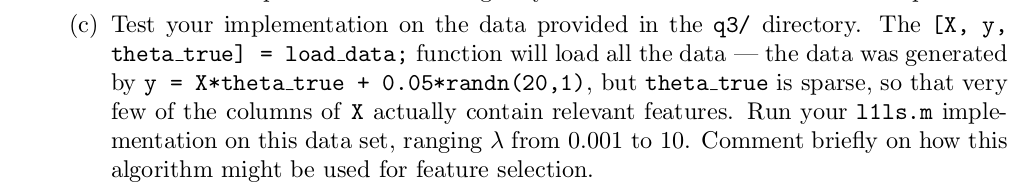

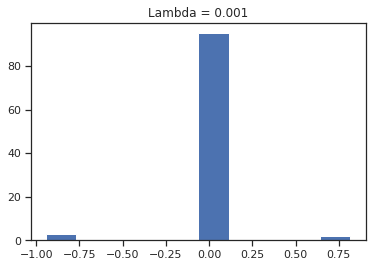

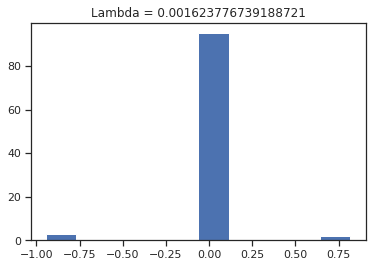

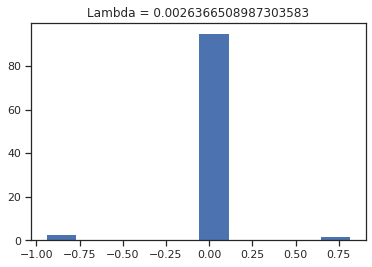

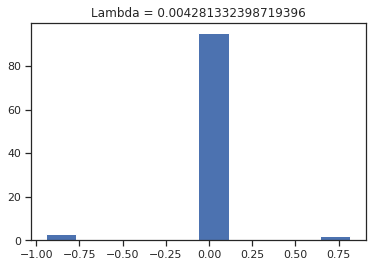

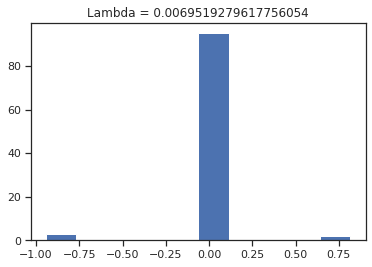

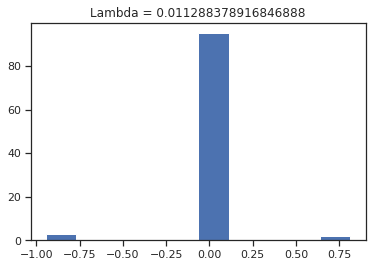

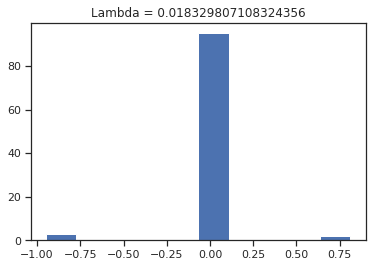

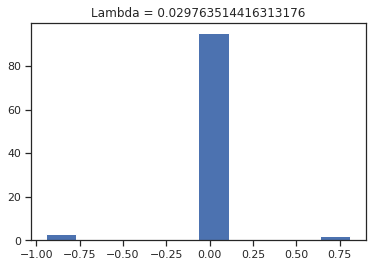

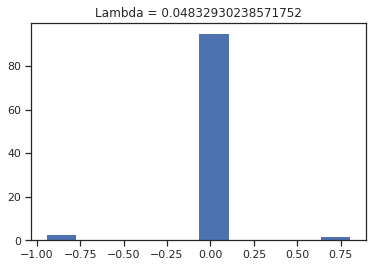

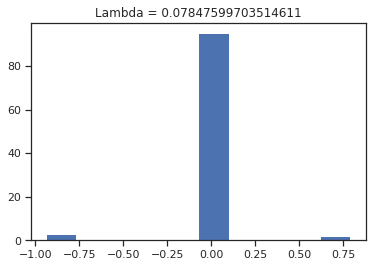

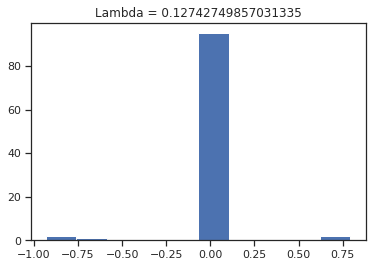

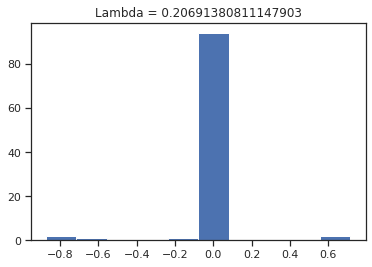

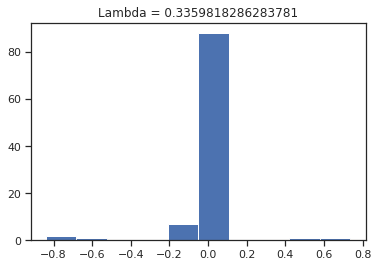

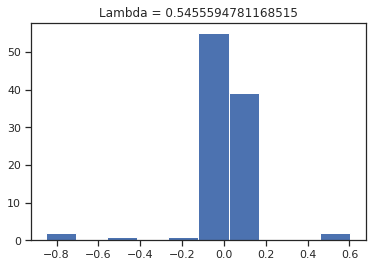

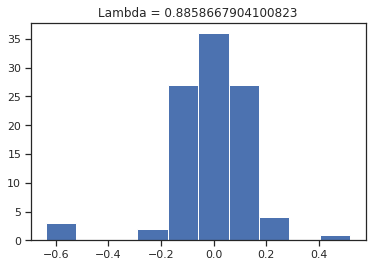

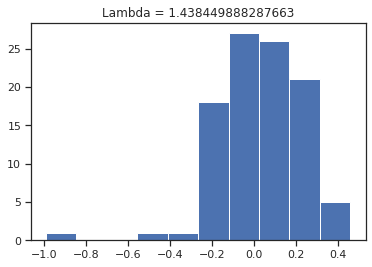

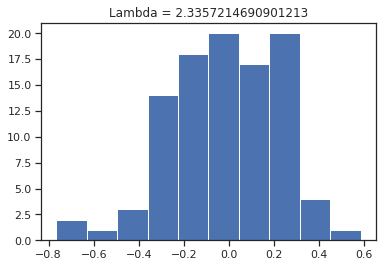

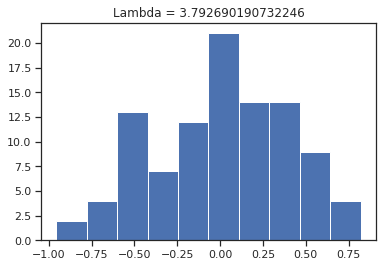

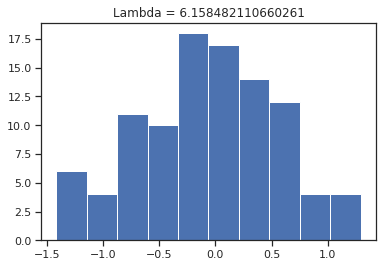

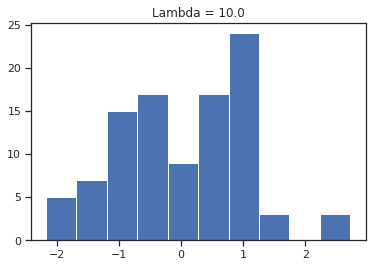

In [106]:
start=-3 #10**start
stop=1   #10**stop
for l in np.logspace(start, stop, num=20):
    theta = l1ls(X, y, lambd=l, VERBOSE=False)
    plt.hist(theta)
    plt.title("Lambda = "+str(l))
    plt.show()

In [50]:
noise  = 0.05*np.random.normal(size=(20,1))
y_true = np.dot(X, theta_true)
y_true

array([[-1.15645835],
       [-1.85811529],
       [ 1.60579202],
       [-0.63001976],
       [ 0.25413356],
       [-0.79569103],
       [ 2.2799369 ],
       [-0.14960836],
       [-2.34871453],
       [-2.45867317],
       [-0.34817116],
       [-0.65168811],
       [-0.93089465],
       [-0.7879309 ],
       [-1.48605463],
       [ 0.07604396],
       [ 0.22017402],
       [-1.64747166],
       [-2.07161108],
       [ 0.2905179 ]])

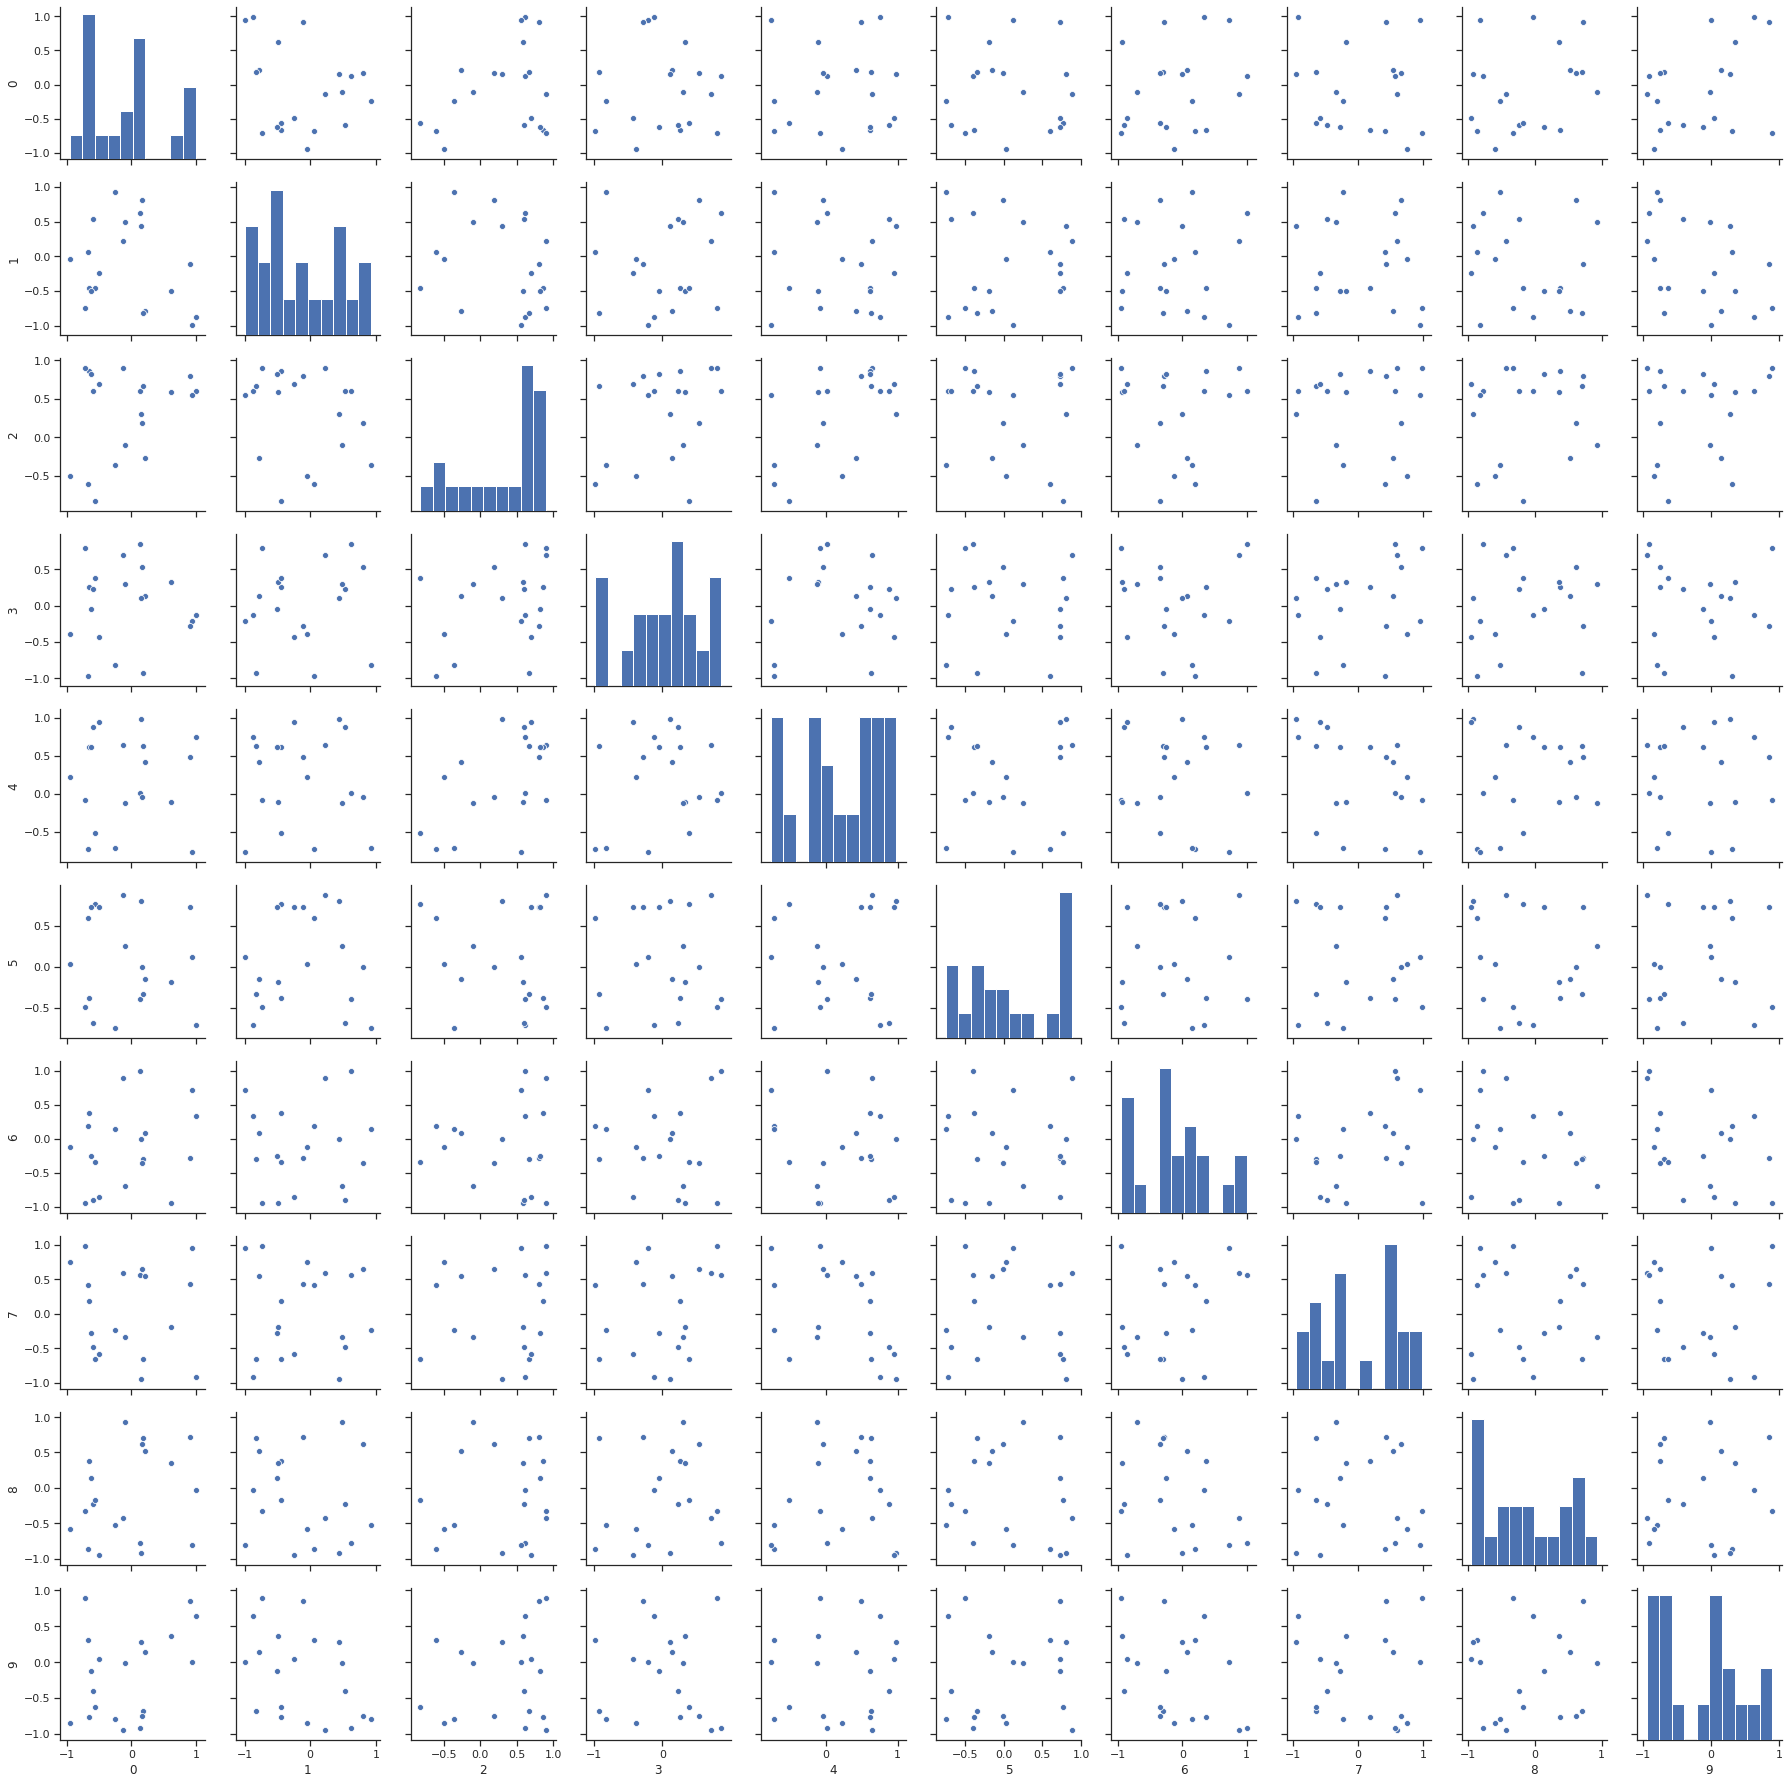

In [72]:
import seaborn as sns
import pandas as pd
sns.set(style="ticks")

df = pd.DataFrame(data   = X[:, 0:10])  # 1st row as the column names
sns.pairplot(df)

(20, 3)


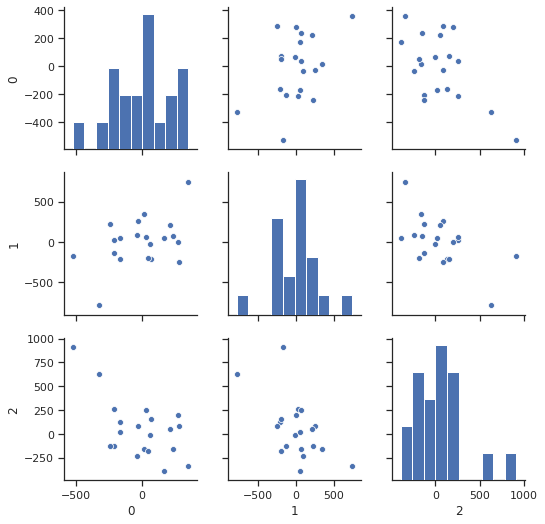

In [73]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3).fit_transform(X)
print(X_embedded.shape)

df = pd.DataFrame(data   = X_embedded)  # 1st row as the column names
sns.pairplot(df)

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

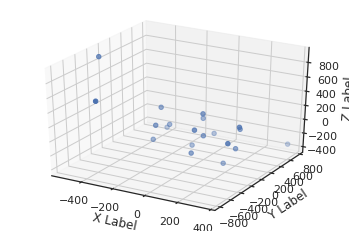

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
x = X_embedded[:, 0]
y = X_embedded[:, 1]
z = X_embedded[:, 2]
ax.scatter(x, y, z, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [76]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(20, 2)

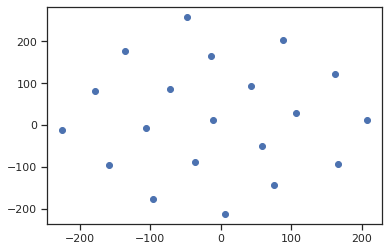

In [77]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

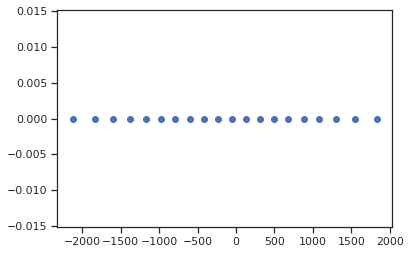

In [78]:
X_embedded = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_embedded, [0]*20 )
plt.show()